In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift
from skimage import color
from skimage.io import imread
from scipy import ndimage

## Goal For a given image:

- Perform a spectral analysis
- Resize the image to get a smaller image of half size
    - in the space domain by subsampling
    - by resizing in the Fourier domain
- Resize the image to get a bigger image of double size
    - by sinc interpolation (zero padding in the Fourier domain)
    - by linear interpolation in the space domain

In [2]:

# Load an example image from skimage and convert it to grayscale
image = color.rgb2gray(imread('data/barbara.jpg'))

# Perform the 2D Fourier Transform
f_transform = fft2(image)
f_transform_shifted = fftshift(f_transform)  # Shift zero frequency to center

# Get the size of the image
rows, cols = image.shape

# Define new size for the cropped frequency domain (half size)
resize_factor = 0.5
new_rows, new_cols = int(rows * resize_factor), int(cols * resize_factor)

# Crop the frequency domain (keeping the low frequencies)
center_row, center_col = rows // 2, cols // 2
cropped_freq = f_transform_shifted[
    center_row - new_rows // 2 : center_row + new_rows // 2,
    center_col - new_cols // 2 : center_col + new_cols // 2
]

# Shift back and perform inverse FFT to get the resized image
cropped_freq_shifted = ifftshift(cropped_freq)
resized_image = ifft2(cropped_freq_shifted)
resized_image = np.abs(resized_image)

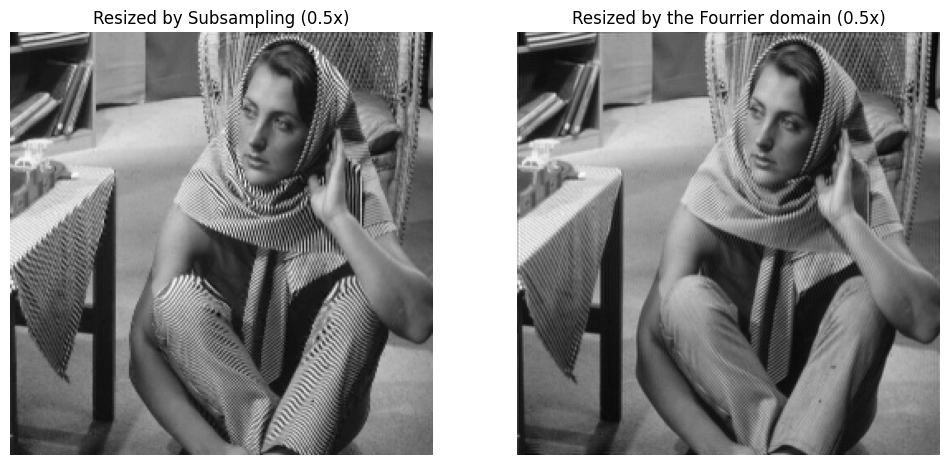

In [3]:
# Plot the resized images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image[::2, ::2], cmap='gray')
ax[0].set_title('Resized by Subsampling (0.5x)')
ax[0].axis('off')

ax[1].imshow(resized_image, cmap='gray')
ax[1].set_title('Resized by the Fourrier domain (0.5x)')
ax[1].axis('off')

plt.show()

In [4]:
# Zoom factor (2x zoom means increase size by 2x)
zoom_factor = 2

# Define new size for the zoomed image in the frequency domain
new_rows, new_cols = int(rows * zoom_factor), int(cols * zoom_factor)

# Initialize a zero array for the zoomed frequency domain
zoomed_freq = np.zeros((new_rows, new_cols), dtype=complex)

# Get center positions of the original and new frequency domain
center_row, center_col = rows // 2, cols // 2
new_center_row, new_center_col = new_rows // 2, new_cols // 2

# Place the original frequency data into the center of the new frequency domain (zero-padding)
zoomed_freq[new_center_row - center_row:new_center_row + center_row,
            new_center_col - center_col:new_center_col + center_col] = f_transform_shifted

# Shift back and perform inverse FFT to get the zoomed image
zoomed_freq_shifted = ifftshift(zoomed_freq)
zoomed_image = ifft2(zoomed_freq_shifted)
zoomed_image = np.abs(zoomed_image)

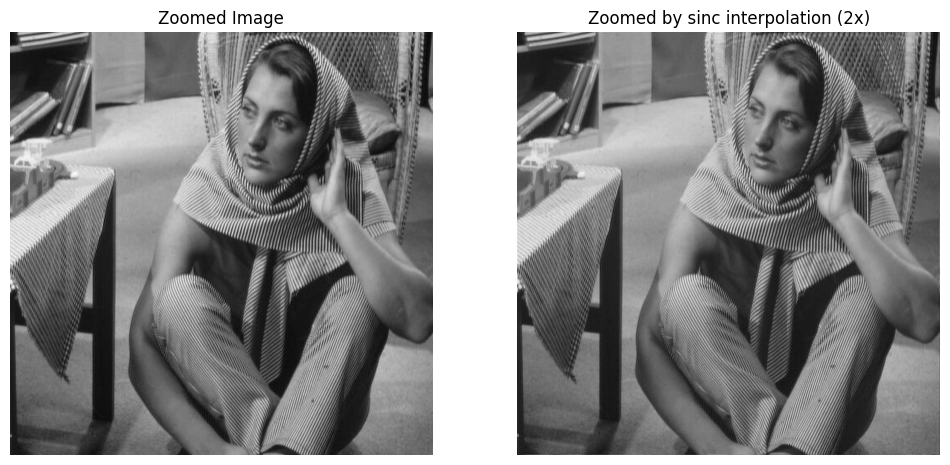

In [5]:
# Plot the original and zoomed images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(ndimage.zoom(image, 2), cmap='gray')
ax[0].set_title('Zoomed Image')
ax[0].axis('off')

ax[1].imshow(zoomed_image, cmap='gray')
ax[1].set_title('Zoomed by sinc interpolation (2x)')
ax[1].axis('off')

plt.show()